<a href="https://colab.research.google.com/github/YUEWU1233/MGT-502-Data-Science-and-Machine-Learning/blob/main/ML_Assignment_one__YueWu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DSML investigation:
### You are part of the Suisse Impossible Mission Force, or SIMF for short. You need to uncover a rogue agent that is trying to steal sensitive information.

### Your mission, should you choose to accept it, is to find that agent before any classified information gets stolen. Good luck!


# Assignment part one

Airport security confiscated a laptop of a spy, which was later given to you. The laptop contains some documents that might be useful in the investigation process. You retrieve those documents and want to analyse them. Our intelligence shows that the person that we are looking for has visited the USA between Sept 2019 to Oct 2020. He is currently working undercover.


##Getting to know our data

We have retrieved from the laptop the following file:
- A list of suspects
- The flight records of these potential suspects



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
userRecords = pd.read_csv("https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/userRecords.csv")
travelRecords = pd.read_csv("https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/flightRecords.csv")

#### Shape of the data

Let's first check how many rows and columns (features) are in the user records

In [5]:
#Your code here
userRecords.shape

print(f"Number of rows: {userRecords.shape[0]}")
print(f"Number of columns: {userRecords.shape[1]}")

Number of rows: 957
Number of columns: 10



#### Check out the first few rows
To protect innocent people, the name of the suspects have been censored, those will be revealed once number of potential suspects decreases.


In [7]:
#Your code here
userRecords.head()

/usr/local/lib/python3.10/dist-packages/lida/components/summarizer.py:74: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cast_date_col = pd.to_datetime(df[column], errors='coerce')


,Unnamed: 0.1,Unnamed: 0,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,0,0,317991,Lu***,Al*****,29-07-2003,AR,1.0,2.0,Web Designer
1,1,1,241892,Ma****,Ro*******,10-11-1999,AR,1.0,0.0,Banker
2,2,2,303376,Fr****,Ac****,25-07-1984,AR,1.0,0.0,Kitchen staff
3,3,3,761992,Fr****,Go***,20-03-1970,AR,1.0,0.0,Teaching Assistant
4,4,4,373318,Jo***,Ro***,05-10-1971,AR,1.0,0.0,Administrative employee


#### List the column/feature names

In [8]:
#Your code here
userRecords.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'UserID', 'first_name', 'last_name',
       'birthday', 'country', 'marital_status', 'number_of_kids',
       'employment'],
      dtype='object')

#### Duplicates
You can check if there are duplicates in the dataset.

In [10]:
#Your code here
userRecords.duplicated().sum()

3

Show the duplicated rows if any:

In [14]:
#Your code here
duplicated_rows = userRecords[userRecords.duplicated]
duplicated_rows

,Unnamed: 0.1,Unnamed: 0,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
19,18,18,100684,Ma*****,Me****,17-06-1976,AR,NaN,0.0,Administrative employee
165,46,46,910382,Ni***,El****,21-03-1975,AZ,NaN,0.0,Administrative employee
290,274,274,610518,An*****,An******,15-02-1953,DK,1.0,NaN,Manager


Drop the duplicate entries if any

In [17]:
#Your code here
userRecords = userRecords.drop_duplicates()
userRecords.shape


(954, 10)

## Spies often use false identities with fabricated data.

####This means that if some coincidences appear a statistically unusual amount of times, the data may be fabricated.

In this part we are going to verify if there are birthdates that have been reused an unusual amount of times.

Lets first ensure that the birthday column has the correct format:


In [18]:
#Check the data type of each feature
#Your code here
userRecords.dtypes

Unnamed: 0.1        int64
Unnamed: 0          int64
UserID              int64
first_name         object
last_name          object
birthday           object
country            object
marital_status     object
number_of_kids    float64
employment         object
dtype: object

Convert the culumn "birthday" to datetime if necessary

In [19]:
#Your code here
userRecords['birthday'] = pd.to_datetime(userRecords['birthday'])
userRecords.dtypes

<ipython-input-19-5ed4e491dba5>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  userRecords['birthday'] = pd.to_datetime(userRecords['birthday'])


Unnamed: 0.1               int64
Unnamed: 0                 int64
UserID                     int64
first_name                object
last_name                 object
birthday          datetime64[ns]
country                   object
marital_status            object
number_of_kids           float64
employment                object
dtype: object

In [20]:
userRecords.head()

,Unnamed: 0.1,Unnamed: 0,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,0,0,317991,Lu***,Al*****,2003-07-29,AR,1.0,2.0,Web Designer
1,1,1,241892,Ma****,Ro*******,1999-10-11,AR,1.0,0.0,Banker
2,2,2,303376,Fr****,Ac****,1984-07-25,AR,1.0,0.0,Kitchen staff
3,3,3,761992,Fr****,Go***,1970-03-20,AR,1.0,0.0,Teaching Assistant
4,4,4,373318,Jo***,Ro***,1971-05-10,AR,1.0,0.0,Administrative employee


Find the list of birthdays that are duplicated/reused in the dataset

In [23]:
#Your code here

duplicated_bdays = userRecords[userRecords.duplicated('birthday', keep=False)]['birthday']
duplicated_bdays

6     1967-07-24
13    2004-11-30
34    1957-06-25
46    1991-02-12
74    1967-07-24
112   1957-12-24
150   1983-03-15
153   1968-09-22
160   1975-01-28
183   1968-09-22
186   1955-08-01
191   1962-07-07
209   1955-08-01
241   1957-12-18
288   1957-12-24
305   1970-03-18
312   1968-09-10
329   2004-11-30
355   1957-06-25
370   1978-11-21
393   1983-03-15
396   1991-02-12
399   1960-03-26
481   1983-08-26
501   1970-06-04
511   1960-06-23
516   1978-11-21
538   1999-09-08
557   1999-12-09
570   1960-03-26
592   1999-09-08
623   1954-03-26
627   1992-01-06
630   1992-01-06
647   1992-01-06
666   1970-03-18
668   1992-01-06
715   1960-06-23
722   1962-07-07
723   1983-08-26
772   1970-06-04
790   1957-12-18
807   1975-01-28
810   1968-09-10
838   1999-12-09
950   1954-03-26
Name: birthday, dtype: datetime64[ns]

Let's count how many people have their birthday on the same day among the duplicated birthdays.

In [26]:
#Your code here
birthday_counts = duplicated_bdays.value_counts()
birthday_counts

1992-01-06    4
2004-11-30    2
1954-03-26    2
1999-12-09    2
1999-09-08    2
1960-06-23    2
1970-06-04    2
1983-08-26    2
1960-03-26    2
1978-11-21    2
1968-09-10    2
1967-07-24    2
1957-12-18    2
1962-07-07    2
1955-08-01    2
1975-01-28    2
1968-09-22    2
1983-03-15    2
1957-12-24    2
1991-02-12    2
1957-06-25    2
1970-03-18    2
Name: birthday, dtype: int64

We can consider that there is no suspicious discrepancy through birthdays.


##We have reasons to believe that the suspect works very thoroughly, so he would make sure that the fabricated data about his identity is complete in order for his operation to run smoothly.
###Therefore, we can exclude the people with incomplete information from the list of potential suspects.

You can call `isnull()` and `sum()` to get a count of how many null values are there in each column.

In [27]:
#Your code here
userRecords.isnull().sum()

Unnamed: 0.1        0
Unnamed: 0          0
UserID              0
first_name          1
last_name           1
birthday            1
country             0
marital_status    102
number_of_kids    152
employment          1
dtype: int64

## Linking the user records to the flight records

We will now proceed to identify the users who were in the USA from Sept 1st, 2019 to Oct 31st, 2020.

We will combine the flight records with the user records in order to ensure that users who have been unsuspected in the previous step are not considered

In [30]:
#check the dataset with user data
userRecords.head()

,Unnamed: 0.1,Unnamed: 0,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,0,0,317991,Lu***,Al*****,2003-07-29,AR,1.0,2.0,Web Designer
1,1,1,241892,Ma****,Ro*******,1999-10-11,AR,1.0,0.0,Banker
2,2,2,303376,Fr****,Ac****,1984-07-25,AR,1.0,0.0,Kitchen staff
3,3,3,761992,Fr****,Go***,1970-03-20,AR,1.0,0.0,Teaching Assistant
4,4,4,373318,Jo***,Ro***,1971-05-10,AR,1.0,0.0,Administrative employee


In [33]:
userRecords.dtypes

Unnamed: 0.1               int64
Unnamed: 0                 int64
UserID                     int64
first_name                object
last_name                 object
birthday          datetime64[ns]
country                   object
marital_status            object
number_of_kids           float64
employment                object
dtype: object

In [31]:
#check the dataset with the flight records
travelRecords.head()

,Unnamed: 0,flightName,departure,destination,date,userID
0,0,KX65826,AR,IT,20-01-2010,317991
1,1,CL12336,IT,MT,16-06-2010,317991
2,2,YN106988,MT,SE,08-05-2011,317991
3,3,CB58289,SE,EE,08-11-2011,317991
4,4,SX625101,EE,AZ,17-11-2011,317991


In [43]:
travelRecords.rename(columns={'userID': 'UserID'}, inplace=True)
travelRecords

,Unnamed: 0,flightName,departure,destination,date,UserID
0,0,KX65826,AR,IT,2010-01-20,317991
1,1,CL12336,IT,MT,2010-06-16,317991
2,2,YN106988,MT,SE,2011-08-05,317991
3,3,CB58289,SE,EE,2011-08-11,317991
4,4,SX625101,EE,AZ,2011-11-17,317991
...,...,...,...,...,...,...
25394,25398,BM96341,PR,DE,2020-10-31,102637
25395,25399,SA710311,DE,CR,2021-09-14,102637
25396,25400,BB83468,CR,DK,2021-11-22,102637
25397,25401,ZS810988,DK,ES,2022-05-09,102637


In [39]:
travelRecords.shape

(25399, 6)

In [37]:
travelRecords['date'] = pd.to_datetime(travelRecords['date'])


<ipython-input-37-8db3ebc4e0b1>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  travelRecords['date'] = pd.to_datetime(travelRecords['date'])


In [38]:
travelRecords.dtypes

Unnamed: 0              int64
flightName             object
departure              object
destination            object
date           datetime64[ns]
userID                  int64
dtype: object

[Merging](https://pandas.pydata.org/docs/user_guide/merging.html) the two datasets:

*Hint: Use the above questions to identify on what feature to merge the datasets*
The result should contain the features flightName, Departure, Arrival,  Date, UserID, first_name, last_name, etc...

In [60]:
#Your code here

merged_data = pd.merge(travelRecords, userRecords, on='UserID', how='left')
merged_data = merged_data[['flightName', 'departure', 'destination', 'date', 'UserID', 'first_name', 'last_name','employment']]

merged_data.head()

,flightName,departure,destination,date,UserID,first_name,last_name,employment
0,KX65826,AR,IT,2010-01-20,317991,Lu***,Al*****,Web Designer
1,CL12336,IT,MT,2010-06-16,317991,Lu***,Al*****,Web Designer
2,YN106988,MT,SE,2011-08-05,317991,Lu***,Al*****,Web Designer
3,CB58289,SE,EE,2011-08-11,317991,Lu***,Al*****,Web Designer
4,SX625101,EE,AZ,2011-11-17,317991,Lu***,Al*****,Web Designer


We can now drop the travel values for users who have been removed from the suspect list prior. (The ones that had missing values)


In [61]:
#Your code here
merged_data_cleaned = merged_data.dropna()
merged_data_cleaned.shape

(25323, 8)

Let's now identify the user who has travelled to the United States (US) between the 1st of september 2019 and the 31st of october 2020

*Note that the travel date is not in datetime format*

In [62]:
merged_data_cleaned['destination'].unique()

array(['IT', 'MT', 'SE', 'EE', 'AZ', 'ES', 'RU', 'JP', 'AT', 'GB', 'KR',
       'DZ', 'LU', 'DE', 'GT', 'HU', 'BG', 'AR', 'BR', 'CR', 'CO', 'MY',
       'CH', 'MD', 'PR', 'IS', 'TR', 'BD', 'ZA', 'MX', 'PL', 'IE', 'FI',
       'SG', 'LT', 'DK', 'IN', 'BE', 'CA', 'HR', 'PT', 'NL', 'NO', 'CZ',
       'US', 'CL', 'FR', 'PH'], dtype=object)

In [63]:
merged_data_cleaned.dtypes

flightName             object
departure              object
destination            object
date           datetime64[ns]
UserID                  int64
first_name             object
last_name              object
employment             object
dtype: object

In [80]:
#Your code here


us_travels = merged_data_cleaned[merged_data_cleaned['destination']=='US']


date_start = pd.Timestamp('2019-09-01')
date_end = pd.Timestamp('2020-10-31')
us_travels_in_date_range = us_travels[(us_travels['date'] >= date_start) & (us_travels['date'] <= date_end)]

us_travels_in_date_range


,flightName,departure,destination,date,UserID,first_name,last_name,employment
268,MG891910,AR,US,2020-07-16,468560,Ga******,Fe*******,Lawyer
638,OO3731010,CA,US,2020-10-04,255830,Ch*******,Be****,Professor
947,OV733110,BE,US,2020-04-06,291994,Pe***,Le*****,Consultant
1003,MY56747,SG,US,2020-02-19,919502,Ma*****,Ba***,Banker
1525,GU84573,ES,US,2020-10-02,861915,Ay***,Al*****,Doctor
1822,DG97595,BD,US,2020-09-05,561296,Jo*,Sa**,Consultant
2077,YM88531,BD,US,2020-03-09,226545,Ru***,Ho*****,Doctor
2339,QG410277,PT,US,2020-10-10,627731,Ch*******,He*****,Lawyer
3454,TF469810,IT,US,2020-03-17,220420,Ma*****,So****,Web Designer
4036,MX97137,FR,US,2020-07-23,297653,Br***,Wo**,Lawyer


## [Data visualisation ](https://pandas.pydata.org/docs/user_guide/visualization.html)

 Suisse Impossible Mission Force is happy with the result and would like to have some visual aid to make a profile of the potential suspects

Let's first make a pie chart to visualise the different employments held from the current suspects:

In [67]:
#Your code here

duplicated_us_travels_in_date_range = us_travels_in_date_range[us_travels_in_date_range.duplicated('UserID', keep=False)]['UserID']
duplicated_us_travels_in_date_range

5031    236456
5033    236456
Name: UserID, dtype: int64

In [81]:
non_duplicated_us_travels_in_date_range = us_travels_in_date_range[['UserID','employment']].drop_duplicates()
non_duplicated_us_travels_in_date_range.shape

(56, 2)

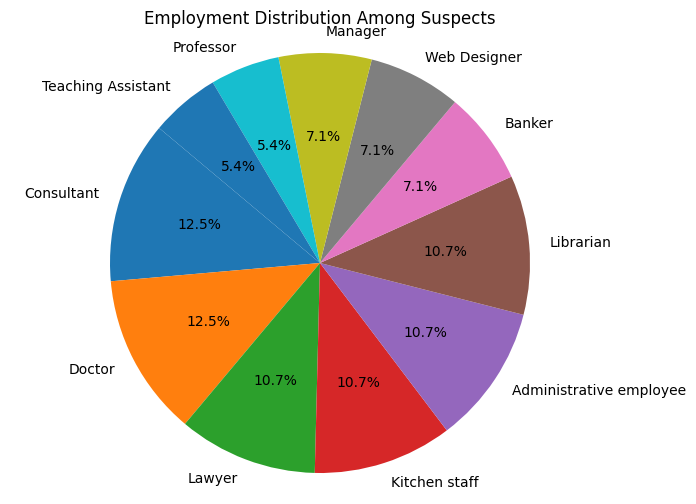

In [83]:
employment_counts = non_duplicated_us_travels_in_date_range['employment'].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Employment Distribution Among Suspects')
plt.axis('equal')
plt.show()

## Journey length

Suisse Impossible Mission Force believes the rogue agent is an outlier from his declared category based on the days spent there compared to others.

We can use boxplots to identify outliers per employment category.

Let's first make two tables, one with the date of arrival and one with the date of departure. You can reuse your previous dataset and identify the arrival and departure date using the destination and departure features on the dataset. Note that the arrival and the departure dates should fall between the time period when the suspect is belived to have visited the US - between Sept 2019 to Oct 2020.

In [86]:
#For this step we will need the information not only about the fights TO THE US, but also about the flights taken FROM THE US

#one with the date of arrival: us_travels_in_date_range

#one with the date of departure: us_travels_in_date_range_out
us_travels_out = merged_data_cleaned[merged_data_cleaned['departure']=='US']


date_start = pd.Timestamp('2019-09-01')
date_end = pd.Timestamp('2020-10-31')
us_travels_in_date_range_out = us_travels_out[(us_travels_out['date'] >= date_start) & (us_travels_out['date'] <= date_end)]

us_travels_in_date_range_out

,flightName,departure,destination,date,UserID,first_name,last_name,employment
639,FR31198,US,NL,2020-07-10,255830,Ch*******,Be****,Professor
948,HO54863,US,AT,2020-06-25,291994,Pe***,Le*****,Consultant
1004,BL39926,US,NL,2020-08-25,919502,Ma*****,Ba***,Banker
2151,DI331075,US,NO,2019-11-17,265615,Er**,La*****,Web Designer
4219,BT95799,US,SG,2019-11-07,205381,Ma**,Pe*****,Kitchen staff
4362,GR979101,US,CH,2020-08-21,805237,Re**,St*****,Doctor
4583,OQ110536,US,BG,2019-10-10,494514,Al*******,Ca****,Consultant
5032,NS716210,US,HU,2019-11-19,236456,Li*****,To****,Doctor
5034,XM106526,US,GB,2020-10-06,236456,Li*****,To****,Doctor
5791,ZA69845,US,NL,2020-07-04,336775,Ke*****,Qu*****,Consultant


We can keep on both these tables the user ID, employment, and departure date / arrival date.

In [93]:
#Your code here

gotoUS = us_travels_in_date_range[['UserID','employment','departure','destination','date']]

leaveUS = us_travels_in_date_range_out[['UserID','employment','departure','destination','date']]


We can now join the two tables on user ID

In [100]:
#Your code here
merge_US = pd.merge(gotoUS, leaveUS, on='UserID', how='inner', suffixes=('_goto', '_leave'))
merge_US

,UserID,employment_goto,departure_goto,destination_goto,date_goto,employment_leave,departure_leave,destination_leave,date_leave
0,255830,Professor,CA,US,2020-10-04,Professor,US,NL,2020-07-10
1,291994,Consultant,BE,US,2020-04-06,Consultant,US,AT,2020-06-25
2,919502,Banker,SG,US,2020-02-19,Banker,US,NL,2020-08-25
3,805237,Doctor,MT,US,2019-12-31,Doctor,US,CH,2020-08-21
4,236456,Doctor,CO,US,2019-10-21,Doctor,US,HU,2019-11-19
5,236456,Doctor,CO,US,2019-10-21,Doctor,US,GB,2020-10-06
6,236456,Doctor,HU,US,2019-12-26,Doctor,US,HU,2019-11-19
7,236456,Doctor,HU,US,2019-12-26,Doctor,US,GB,2020-10-06
8,336775,Consultant,BE,US,2020-04-02,Consultant,US,NL,2020-07-04
9,412064,Banker,CH,US,2019-12-06,Banker,US,IE,2019-10-21


We can now create a new feature called journey_length representing the  departure date - arrival date

*Sidenote: if you get negative journey length, what would be your explanation to that?*


In [101]:
#Your code here

# Calculate journey_length as the difference between departure_date and arrival_date
merge_US['journey_length (days)'] = merge_US['date_leave'] - merge_US['date_goto']

merge_US

# If the journey length is negative, it means during this period of time, this person leave US and then go back to US.

,UserID,employment_goto,departure_goto,destination_goto,date_goto,employment_leave,departure_leave,destination_leave,date_leave,journey_length (days)
0,255830,Professor,CA,US,2020-10-04,Professor,US,NL,2020-07-10,-86 days
1,291994,Consultant,BE,US,2020-04-06,Consultant,US,AT,2020-06-25,80 days
2,919502,Banker,SG,US,2020-02-19,Banker,US,NL,2020-08-25,188 days
3,805237,Doctor,MT,US,2019-12-31,Doctor,US,CH,2020-08-21,234 days
4,236456,Doctor,CO,US,2019-10-21,Doctor,US,HU,2019-11-19,29 days
5,236456,Doctor,CO,US,2019-10-21,Doctor,US,GB,2020-10-06,351 days
6,236456,Doctor,HU,US,2019-12-26,Doctor,US,HU,2019-11-19,-37 days
7,236456,Doctor,HU,US,2019-12-26,Doctor,US,GB,2020-10-06,285 days
8,336775,Consultant,BE,US,2020-04-02,Consultant,US,NL,2020-07-04,93 days
9,412064,Banker,CH,US,2019-12-06,Banker,US,IE,2019-10-21,-46 days


In [102]:
merge_US['journey_length (days)'] = merge_US['journey_length (days)'].dt.days
merge_US.dtypes


UserID                            int64
employment_goto                  object
departure_goto                   object
destination_goto                 object
date_goto                datetime64[ns]
employment_leave                 object
departure_leave                  object
destination_leave                object
date_leave               datetime64[ns]
journey_length (days)             int64
dtype: object

We can now create the boxplots

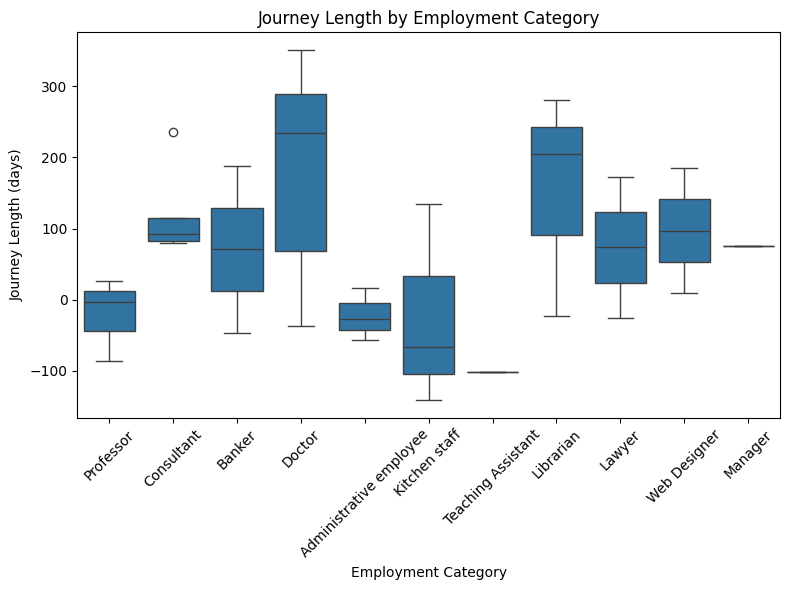

In [104]:
#Your code here

plt.figure(figsize=(8, 6))
sns.boxplot(x='employment_leave', y='journey_length (days)', data=merge_US)
plt.xticks(rotation=45)
plt.title('Journey Length by Employment Category')
plt.ylabel('Journey Length (days)')
plt.xlabel('Employment Category')

# Show the plot
plt.tight_layout()
plt.show()


##SIMF is satisfied with your work but believes the current data is inconclusive.

Your investigation will continue when more intelligence comes in...